In [1]:
# Import required modules
from renoir.color import ColorNamer, ColorExtractor, ColorVisualizer
import numpy as np

## 1. Basic Color Naming

Let's start by naming individual colors using the default **artist** vocabulary, which contains traditional pigment names.

In [2]:
# Initialize ColorNamer with artist vocabulary
namer = ColorNamer(vocabulary="artist")

# Name a single color (Cadmium Orange)
color = (255, 87, 51)
name = namer.name(color)

print(f"RGB {color} is called: {name}")

RGB (255, 87, 51) is called: Burnt Sienna


In [3]:
# You can also use hex colors
hex_color = "#003153"
name = namer.name(hex_color)

print(f"Hex {hex_color} is called: {name}")

Hex #003153 is called: Prussian Blue


## 2. Getting Detailed Metadata

Request full metadata including Color Index names, color families, and perceptual distance.

In [4]:
# Get detailed information about a color
result = namer.name((45, 82, 128), return_metadata=True)

print("\nDetailed Color Information:")
print("="*50)
print(f"Name: {result['name']}")
print(f"Hex: {result['hex']}")
print(f"RGB: {result['rgb']}")
print(f"Family: {result['family']}")
print(f"Color Index: {result.get('ci_name', 'N/A')}")
print(f"Perceptual Distance: {result['distance']:.3f}")
print(f"Vocabulary: {result['vocabulary']}")


Detailed Color Information:
Name: Cobalt Blue
Hex: #0047AB
RGB: (0, 71, 171)
Family: Blue
Color Index: PB28
Perceptual Distance: 6.470
Vocabulary: artist


## 3. Exploring Different Vocabularies

ColorNamer supports multiple naming systems, each with its own character and use case.

In [5]:
# Check available vocabularies
vocabularies = ColorNamer.available_vocabularies()
print("Available vocabularies:", vocabularies)

Available vocabularies: ['artist', 'resene', 'natural', 'xkcd']


In [6]:
# Compare the same color across different vocabularies
test_color = (214, 138, 89)

print(f"\nNaming RGB {test_color} in different vocabularies:")
print("="*60)

for vocab in vocabularies:
    namer.set_vocabulary(vocab)
    name = namer.name(test_color)
    print(f"{vocab.upper():12} → {name}")


Naming RGB (214, 138, 89) in different vocabularies:
ARTIST       → Raw Sienna
RESENE       → Christine
NATURAL      → Ochre Brown
XKCD         → pinkish tan


### Vocabulary Characteristics:

- **artist**: Traditional pigment names (Burnt Sienna, Prussian Blue) with Color Index names
- **resene**: Evocative interior design names (Copper Canyon, Thunderbird)
- **natural**: 18th-century Werner's Nomenclature (naturalist vocabulary)
- **xkcd**: Crowdsourced, conversational names from the XKCD color survey

## 4. Naming Color Palettes

Name multiple colors at once - perfect for working with extracted palettes.

In [7]:
# Create a sample palette
palette = [
    (255, 87, 51),   # Orange-red
    (100, 200, 150), # Teal-green
    (50, 100, 200),  # Blue
    (204, 119, 34),  # Yellow-brown
    (138, 51, 36)    # Dark red-brown
]

# Name the palette with artist vocabulary
namer.set_vocabulary("artist")
names = namer.name_palette(palette)

print("\nPalette with Artist Names:")
print("="*50)
for rgb, name in zip(palette, names):
    print(f"RGB {rgb} → {name}")


Palette with Artist Names:
RGB (255, 87, 51) → Burnt Sienna
RGB (100, 200, 150) → Permanent Green Light
RGB (50, 100, 200) → Cerulean Blue
RGB (204, 119, 34) → Yellow Ochre
RGB (138, 51, 36) → Burnt Umber


In [8]:
# Get full metadata for palette
palette_metadata = namer.name_palette(palette, return_metadata=True)

print("\nPalette with Full Metadata:")
print("="*70)
for i, meta in enumerate(palette_metadata, 1):
    print(f"{i}. {meta['name']}")
    print(f"   {meta['hex']} | Family: {meta['family']} | CI: {meta.get('ci_name', 'N/A')}")
    print()


Palette with Full Metadata:
1. Burnt Sienna
   #E97451 | Family: Brown | CI: PBr7

2. Permanent Green Light
   #7FCD91 | Family: Green | CI: PG7

3. Cerulean Blue
   #2A52BE | Family: Blue | CI: PB35

4. Yellow Ochre
   #CC7722 | Family: Yellow | CI: PY43

5. Burnt Umber
   #8A3324 | Family: Brown | CI: PBr7



## 5. Finding Closest Physical Pigments

Use `closest_pigment()` to find the nearest actual artist pigment with a Color Index name - useful for digital-to-physical color matching!

In [9]:
# Find closest physical pigment for a digital color
digital_color = (65, 105, 225)  # A specific blue

pigment = namer.closest_pigment(digital_color)

print("\nClosest Physical Pigment:")
print("="*60)
print(f"Digital Color: RGB {digital_color}")
print(f"\nClosest Pigment: {pigment['name']}")
print(f"Color Index Name: {pigment['ci_name']}")
print(f"Pigment RGB: {pigment['rgb']}")
print(f"Hex: {pigment['hex']}")
print(f"Family: {pigment['family']}")
print(f"Perceptual Distance: {pigment['distance']:.3f}")

if pigment.get('description'):
    print(f"\nDescription: {pigment['description']}")


Closest Physical Pigment:
Digital Color: RGB (65, 105, 225)

Closest Pigment: Ultramarine Blue
Color Index Name: PB29
Pigment RGB: (65, 102, 245)
Hex: #4166F5
Family: Blue
Perceptual Distance: 2.791

Description: Warm, intense blue with violet undertones


## 6. Vocabulary Information

Get statistics and metadata about each vocabulary.

In [10]:
# Get information about artist vocabulary
namer.set_vocabulary("artist")
info = namer.get_vocabulary_info()

print("\nArtist Vocabulary Information:")
print("="*60)
print(f"Total Colors: {info['count']}")
print(f"Colors with CI Names: {info['ci_names']}")
print(f"\nColor Families:")
for family, count in sorted(info['families'].items(), key=lambda x: x[1], reverse=True):
    print(f"  {family}: {count}")


Artist Vocabulary Information:
Total Colors: 49
Colors with CI Names: 47

Color Families:
  Red: 9
  Green: 8
  Yellow: 7
  Brown: 7
  Blue: 7
  Violet: 4
  Black: 3
  White: 2
  Orange: 1
  Grey: 1


## 7. Visualizing Named Palettes

Use ColorVisualizer to create beautiful visualizations with evocative color names.

Traditional palette visualization with hex codes:


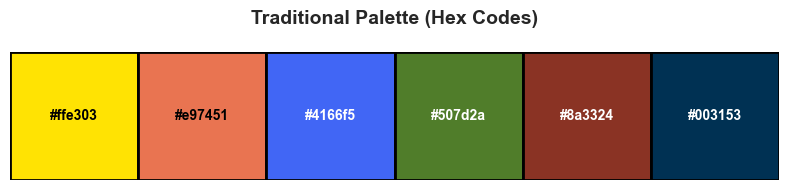

In [11]:
# Initialize visualizer
visualizer = ColorVisualizer()

# Create a richer palette
rich_palette = [
    (255, 227, 3),   # Bright yellow
    (233, 116, 81),  # Red-orange
    (65, 102, 245),  # Bright blue
    (80, 125, 42),   # Yellow-green
    (138, 51, 36),   # Dark red-brown
    (0, 49, 83)      # Deep blue
]

# Plot with hex codes (traditional)
print("Traditional palette visualization with hex codes:")
visualizer.plot_palette(rich_palette, title="Traditional Palette (Hex Codes)")


Palette with artist pigment names:


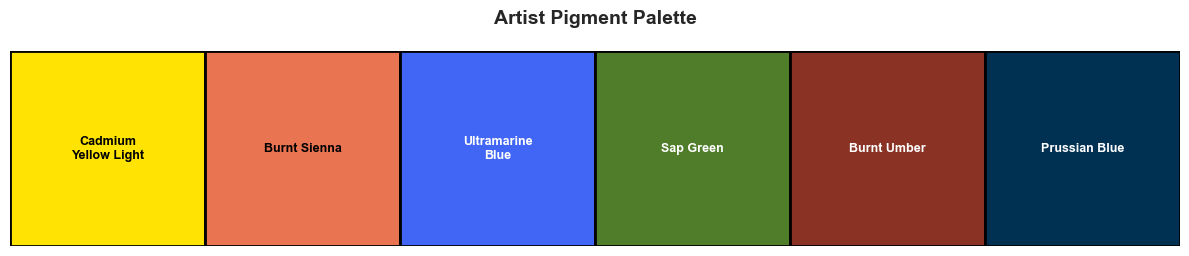

In [12]:
# Plot with evocative names using artist vocabulary
print("\nPalette with artist pigment names:")
visualizer.plot_palette(
    rich_palette,
    title="Artist Pigment Palette",
    show_names=True,
    vocabulary="artist"
)


Rich visualization with metadata:


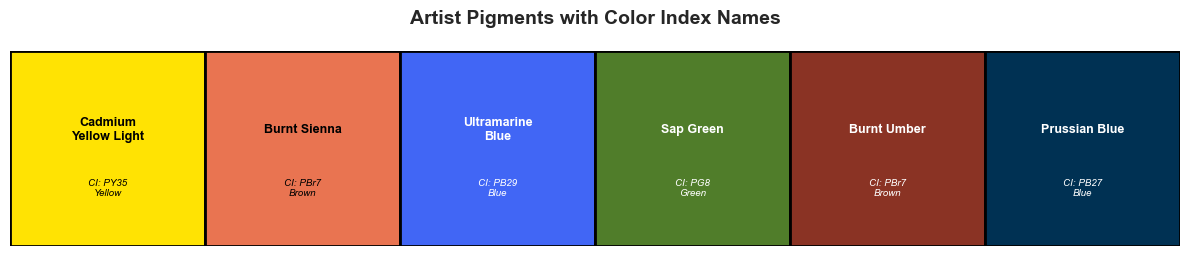

In [13]:
# Use the dedicated named palette visualization with metadata
print("\nRich visualization with metadata:")
visualizer.plot_named_palette(
    rich_palette,
    vocabulary="artist",
    title="Artist Pigments with Color Index Names",
    show_metadata=True
)

## 8. Comparing Vocabularies Visually

See how the same palette is named across different vocabularies.

Artist Pigment Names:


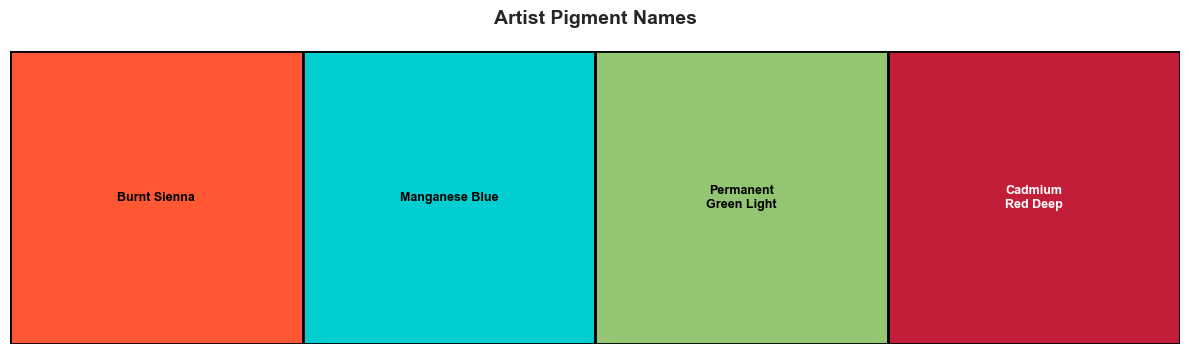

In [14]:
# Same palette, different vocabularies
comparison_palette = [
    (255, 87, 51),
    (0, 206, 209),
    (147, 197, 114),
    (194, 30, 58)
]

# Artist vocabulary
print("Artist Pigment Names:")
visualizer.plot_named_palette(
    comparison_palette,
    vocabulary="artist",
    title="Artist Pigment Names"
)

In [ ]:
# XKCD crowdsourced names
print("\nXKCD Crowdsourced Names:")
visualizer.plot_named_palette(
    comparison_palette,
    vocabulary="xkcd",
    title="XKCD Crowdsourced Names"
)

In [ ]:
# Resene design names
print("\nResene Paint Names:")
visualizer.plot_named_palette(
    comparison_palette,
    vocabulary="resene",
    title="Resene Interior Design Names"
)

## 9. Real-World Application: Analyzing Artwork Colors

Let's create a simulated artwork palette and name the colors.

In [ ]:
# Simulate a color palette from an impressionist painting
# (In practice, you'd extract these from actual artwork images)
impressionist_palette = [
    (255, 244, 79),   # Bright yellow (sunlight)
    (135, 206, 235),  # Sky blue
    (80, 200, 120),   # Grass green
    (233, 116, 81),   # Warm orange
    (106, 13, 173)    # Purple shadows
]

# Name with artist vocabulary
namer.set_vocabulary("artist")
print("Impressionist Palette Analysis:")
print("="*60)

for rgb in impressionist_palette:
    result = namer.name(rgb, return_metadata=True)
    print(f"\n{result['name']}")
    print(f"  RGB: {rgb}")
    print(f"  Family: {result['family']}")
    if result.get('ci_name'):
        print(f"  Pigment: {result['ci_name']}")
    if result.get('description'):
        print(f"  Description: {result['description']}")

In [ ]:
# Visualize the impressionist palette
visualizer.plot_named_palette(
    impressionist_palette,
    vocabulary="artist",
    title="Impressionist Palette - Artist Pigment Names",
    show_metadata=True
)

## 10. Educational Exercise: Color Perception

Demonstrate how CIEDE2000 matches human color perception by comparing similar colors.

In [ ]:
# Compare two similar blues
blue1 = (65, 102, 245)   # Slightly lighter
blue2 = (50, 90, 235)    # Slightly darker

namer.set_vocabulary("artist")

result1 = namer.name(blue1, return_metadata=True)
result2 = namer.name(blue2, return_metadata=True)

print("Comparing Similar Blues:")
print("="*60)
print(f"\nColor 1: RGB {blue1}")
print(f"  Named: {result1['name']}")
print(f"  Match distance: {result1['distance']:.3f}")

print(f"\nColor 2: RGB {blue2}")
print(f"  Named: {result2['name']}")
print(f"  Match distance: {result2['distance']:.3f}")

if result1['name'] == result2['name']:
    print(f"\n✓ Both colors are perceptually similar enough to be called '{result1['name']}'")
else:
    print(f"\n✗ Colors are perceptually different: '{result1['name']}' vs '{result2['name']}'")

## Summary

You've learned how to:

1. ✓ Convert RGB/hex colors to evocative names
2. ✓ Use different naming vocabularies (artist, xkcd, resene, natural)
3. ✓ Find Color Index Names for physical paint matching
4. ✓ Name entire color palettes
5. ✓ Visualize palettes with names instead of hex codes
6. ✓ Understand perceptual color matching with CIEDE2000

## Next Steps

- Try extracting colors from actual artwork images using `ColorExtractor`
- Experiment with different vocabularies for various use cases
- Use `closest_pigment()` to plan physical painting projects
- Create custom color naming systems by adding new vocabulary JSON files

## Additional Resources

- [CIEDE2000 Color Difference](https://en.wikipedia.org/wiki/Color_difference#CIEDE2000)
- [Werner's Nomenclature of Colours](https://www.c82.net/werner/)
- [Color Index Names](https://www.artiscreation.com/Color_index_names.html)
- [XKCD Color Survey](https://xkcd.com/color/rgb/)